In [74]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

from sklearn import svm

In [75]:
train_data = pd.read_csv("train.csv")

In [76]:
train_data

,income,infant,region,oil
0,281,180.0,Africa,no
1,110,125.0,Asia,yes
2,123,100.0,Asia,no
3,335,65.1,Americas,no
4,75,400.0,Asia,no
...,...,...,...,...
79,130,100.0,Asia,no
80,956,44.8,Europe,no
81,102,124.3,Asia,no
82,406,43.3,Europe,no


In [58]:
train_data.describe()

,income,infant
count,84.000000,80.000000
mean,969.238095,92.267500
std,1402.084091,96.693918
min,50.000000,9.600000
25%,117.500000,26.800000
50%,334.000000,61.850000
75%,1047.750000,130.275000
max,5596.000000,650.000000


In [77]:
def label_encoding(data, name, le=None):
    if le is None:
        le = LabelEncoder()
        if name == "region":
            for index, row in data.iterrows():
        retVal = 0
        if row['region'] == "Asia":
            retVal = 1
        elif row['region'] == "Americas":
            retVal = 2
        elif row['region'] == "Europe":
            retVal = 3
        data.iloc[index, data.columns.get_loc('region')] = retVal
#             le = le.fit(["Africa", "Asia", "Americas", "Europe"])
#             print(le.classes_)
        else:
            le = le.fit(list(set(data[name])))
            data[name] = le.transform(data[name])
    return le

label_encoding(train_data, 'oil')
label_encoding(train_data, 'region')

In [78]:
train_data.corr()

,income,infant,region,oil
income,1.000000,-0.291310,0.608288,-0.018219
infant,-0.291310,1.000000,-0.510344,-0.310175
region,0.608288,-0.510344,1.000000,0.081953
oil,-0.018219,-0.310175,0.081953,1.000000


In [29]:
data = train_data.dropna()
data.corr()
data[0:10]

,income,infant,region,oil
0,281,180.0,0,0
1,110,125.0,2,1
2,123,100.0,2,0
3,335,65.1,1,0
4,75,400.0,2,0
5,1000,71.5,0,0
6,507,46.0,1,0
7,295,32.0,2,0
8,2298,25.7,3,0
10,4103,11.6,3,0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


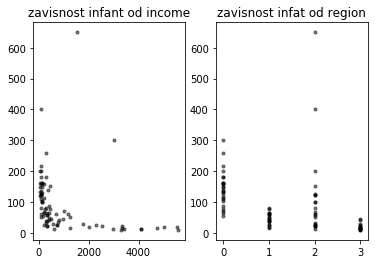

In [61]:
X_income = []
X_region = []
y = []

for index, row in data.iterrows():
    X_income.append(row['income'])
    X_region.append(row['region'])
    y.append(row['infant'])
    
# print(len(X))
# print(len(y))
colors = (0,0,0)
area = np.pi*3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('zavisnost infant od income')
ax1.scatter(X_income, y, s=area, c=colors, alpha=0.5)
ax2.set_title('zavisnost infat od region')
ax2.scatter(X_region, y, s=area, c=colors, alpha=0.5)


plt.show()



In [67]:
X = []
y = []

for index, row in data.iterrows():
    X.append([row['income'], row['region']])
    y.append(row['infant'])

X = np.array([x for x in X])
    
regr = svm.SVR()
regr.fit(X,y)
print(regr.score(X,y))
# reg = LinearRegression().fit(X, y)
# print(reg.score(X, y))
# print(reg.coef_)
# print(reg.intercept_)

-0.08506094525989316


/home/dusan/Documents/Soft/vezbe/sc-2019-siit/env/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [52]:
for index, row in train_data.iterrows():
    if pd.isnull(row['infant']):
        row['infant'] = reg.predict(np.array([[row['oil'], row['region']]]))[0]
        print(row['infant'])

63.48172111049595
63.48172111049595
163.54108993118717
92.61711619077752
